# Tomograph Simulation

Simple tomograph simulation for 2d pictures (*.bmp format)

### Necessary imports:

In [1]:
%matplotlib inline

In [2]:
from bresenham import bresenham
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import os
import tomograph_functions as tf

### Main parameters to set before computing:

In [3]:
# file name of image to process *.bmp
FILE = "brain.bmp"
# localization in file system
PATH = "pictures"

# number of detectors
detectors_num = 135
# angle between first and last detector
detector_deg = 90
# number of iterations
iterations = 360

 ### Importing and showing original image:

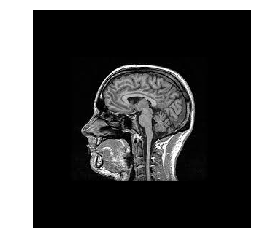

In [4]:
pic_path = os.path.join(PATH, FILE)
img = Image.open(pic_path).convert('L')

new, radius = tf.make_square(img)

plt.imshow(new, cmap='gray')
plt.axis("off")
plt.show()

### Main computations

In [5]:
out, history, sinogram, sinogram_history = tf.process_cone(detectors_num, detector_deg, iterations, radius, new)

### Image after tomograph processing:

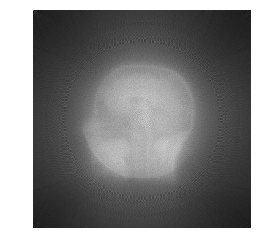

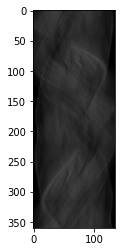

In [6]:
final_image = tf.convert_to_image(out)
sinogram_final = tf.convert_to_image(sinogram)

plt.imshow(final_image,cmap='gray')
plt.axis("off")
plt.show()

plt.imshow(sinogram_final,cmap='gray')
plt.show()

## Tomograph work animated:

In [18]:
def init():
    img.set_data([[],[]])
    return [img]

def animate(i):
    img.set_data(history[i])
    return [img]
"""
mpl.rcParams['animation.embed_limit'] = 40.0
#history = prepare_images(history)
fig, ax = plt.subplots()
ax.axis("off")
img = ax.imshow(history[0], cmap='gray')
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=len(history), interval=100)

HTML(anim.to_jshtml())
"""

'\nmpl.rcParams[\'animation.embed_limit\'] = 40.0\n#history = prepare_images(history)\nfig, ax = plt.subplots()\nax.axis("off")\nimg = ax.imshow(history[0], cmap=\'gray\')\nanim = animation.FuncAnimation(fig, animate, init_func=init,frames=len(history), interval=100)\n\nHTML(anim.to_jshtml())\n'

## Sinogram creation animated

In [10]:
def init():
    img.set_data([[],[]])
    return [img]

def animate(i):
    img.set_data(history[i])
    return [img]

"""
mpl.rcParams['animation.embed_limit'] = 40.0
history = tf.prepare_sinograms(sinogram_history, iterations, detectors_num)
fig, ax = plt.subplots()
ax.axis("off")
img = ax.imshow(history[0])
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=len(history), interval=100)

HTML(anim.to_jshtml())
"""

'\nmpl.rcParams[\'animation.embed_limit\'] = 40.0\nhistory = tf.prepare_sinograms(sinogram_history, iterations, detectors_num)\nfig, ax = plt.subplots()\nax.axis("off")\nimg = ax.imshow(history[0])\nanim = animation.FuncAnimation(fig, animate, init_func=init,frames=len(history), interval=100)\n\nHTML(anim.to_jshtml())\n'